# Assignment
The goal is to see if a student will repeat the year or not ("repeated" column). Execute and present the data explorative analysis. Train a few machine learning models, using python, and with hyperparameter search, and pick the best algorithm based on the performance on the validation dataset.

Based on the complete dataset and by using python, answer the following questions:
1. Which school has the biggest average number of failures (failures column)?
2. How many PCA components (based on columns age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, repeated) are needed for 85% proportion of variance explained?

## Explorative data analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
raw_data = pd.read_csv("schools_data.csv", header = 0)
data = raw_data.copy()
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
0,MS,F,15,Urban,>3,Married,2,3,other,other,...,False,3,5,1,1,1,5,0,0,validation
1,MS,M,15,Urban,<=3,Married,4,3,teacher,services,...,False,5,4,3,1,1,4,2,0,train
2,MS,M,16,Rural,>3,Divorced,4,4,other,teacher,...,True,2,4,3,1,1,5,7,0,validation
3,MS,F,15,Rural,>3,Married,3,4,services,health,...,False,4,3,2,1,1,5,2,0,train
4,MS,F,15,Rural,>3,Married,2,2,at_home,other,...,False,4,3,1,1,1,2,8,0,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,GP,F,19,Urban,>3,Married,0,1,at_home,other,...,False,3,4,2,1,1,5,2,1,train
7896,GP,M,18,Rural,>3,Married,2,2,services,other,...,False,3,3,3,1,2,4,0,1,validation
7897,GP,M,16,Rural,>3,Married,4,4,teacher,teacher,...,False,3,5,5,2,5,4,8,0,train
7898,GP,F,15,Rural,>3,Married,3,4,services,teacher,...,True,4,2,2,2,2,5,0,0,train


In [52]:
data.shape

(7900, 32)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          7900 non-null   object
 1   sex             7900 non-null   object
 2   age             7900 non-null   int64 
 3   address         7900 non-null   object
 4   famsize         7900 non-null   object
 5   Pstatus         7900 non-null   object
 6   Medu            7900 non-null   int64 
 7   Fedu            7900 non-null   int64 
 8   Mjob            7900 non-null   object
 9   Fjob            7900 non-null   object
 10  reason          7900 non-null   object
 11  guardian        7900 non-null   object
 12  traveltime      7900 non-null   int64 
 13  studytime       7900 non-null   int64 
 14  failures        7900 non-null   int64 
 15  schoolsup       7900 non-null   bool  
 16  famsup          7900 non-null   bool  
 17  paid            7900 non-null   bool  
 18  activiti

The dataset has 7900 samples and 32 attributes. One column (data_perimeter) specifies the training/test datasets, one column (repeated) is the target variable, 13 columns are of numeric type and 17 columns are categorical.

In [54]:
data['data_perimeter'].value_counts(normalize=True)

train         0.701899
validation    0.298101
Name: data_perimeter, dtype: float64

The dataset is split into training/test roughly 70%/30%.

In [55]:
data['repeated'].value_counts(normalize=True)

0    0.697215
1    0.302785
Name: repeated, dtype: float64

In [56]:
data[data['data_perimeter'] == "train"]['repeated'].value_counts(normalize=True)

0    0.704418
1    0.295582
Name: repeated, dtype: float64

In [57]:
data[data['data_perimeter'] == "validation"]['repeated'].value_counts(normalize=True)

0    0.680255
1    0.319745
Name: repeated, dtype: float64

The test dataset is not fully proportional to the training set by comparing the target variable value proportions.

In [58]:
pd.isnull(data).any(1).unique()

array([False])

The dataset does not have any missing values.

In [59]:
data[data['data_perimeter'] == "train"].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,repeated
count,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000,5545.000000
mean,16.697385,2.744815,2.522994,1.447610,2.046168,0.329486,3.955275,3.240577,3.117944,1.470694,2.281335,3.563390,5.752029,0.295582
std,1.274558,1.098989,1.083901,0.700318,0.841109,0.740382,0.888936,0.994671,1.117781,0.888183,1.287295,1.387949,8.235837,0.456345
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000


In [60]:
data[data['data_perimeter'] == "validation"].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,repeated
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,16.693418,2.760085,2.518047,1.449257,2.010191,0.345223,3.918471,3.223355,3.087473,1.505308,2.314225,3.533333,5.607219,0.319745
std,1.274655,1.080343,1.094123,0.688134,0.831045,0.748358,0.910700,1.004771,1.097998,0.892878,1.284089,1.390301,7.392149,0.466477
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,1.000000


The comparison of data distribution between the training and test set does not show large deviations. The attributes vary in scale and distribution and this should be addressed during the data preprocessing.

In [61]:
data[data['data_perimeter'] == "train"].describe(include=['object', 'bool'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,data_perimeter
count,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545,5545
unique,4,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,1
top,GP,F,Urban,>3,Married,other,other,course,mother,False,True,False,True,True,True,True,False,train
freq,1751,2935,4304,3970,4997,1982,3047,2053,3837,4852,3397,2973,2821,4437,5264,4616,3673,5545


In [62]:
data[data['data_perimeter'] == "validation"].describe(include=['object', 'bool'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,data_perimeter
count,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355
unique,4,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,1
top,GP,F,Urban,>3,Married,other,other,course,mother,False,True,False,True,True,True,True,False,validation
freq,751,1225,1836,1650,2083,838,1293,847,1623,2028,1443,1307,1199,1843,2236,1964,1587,2355


All categorical attribute values appear in training and in test dataset.

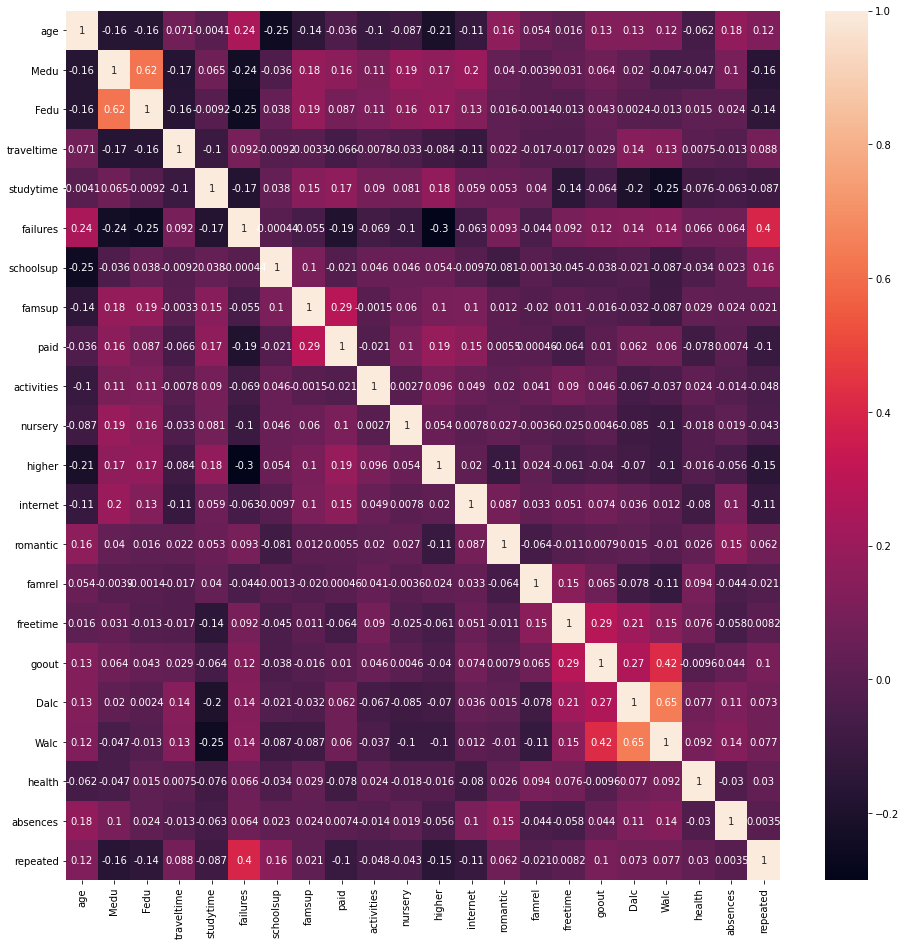

In [63]:
plt.figure(figsize = (16,16))
sns.heatmap(data.corr(), annot=True)
plt.show()

We generate the correlation matrix to find similiarities between attributes and to see if there are candidates for discarding. By checking the numerical and boolean attributes, we see no large similiarities. There is a small similarity between Medu and Fedu, Dalc and Walc, but for preliminary modelling we can leave them in. There is also a similarity between failures and repeated, but this is logical.

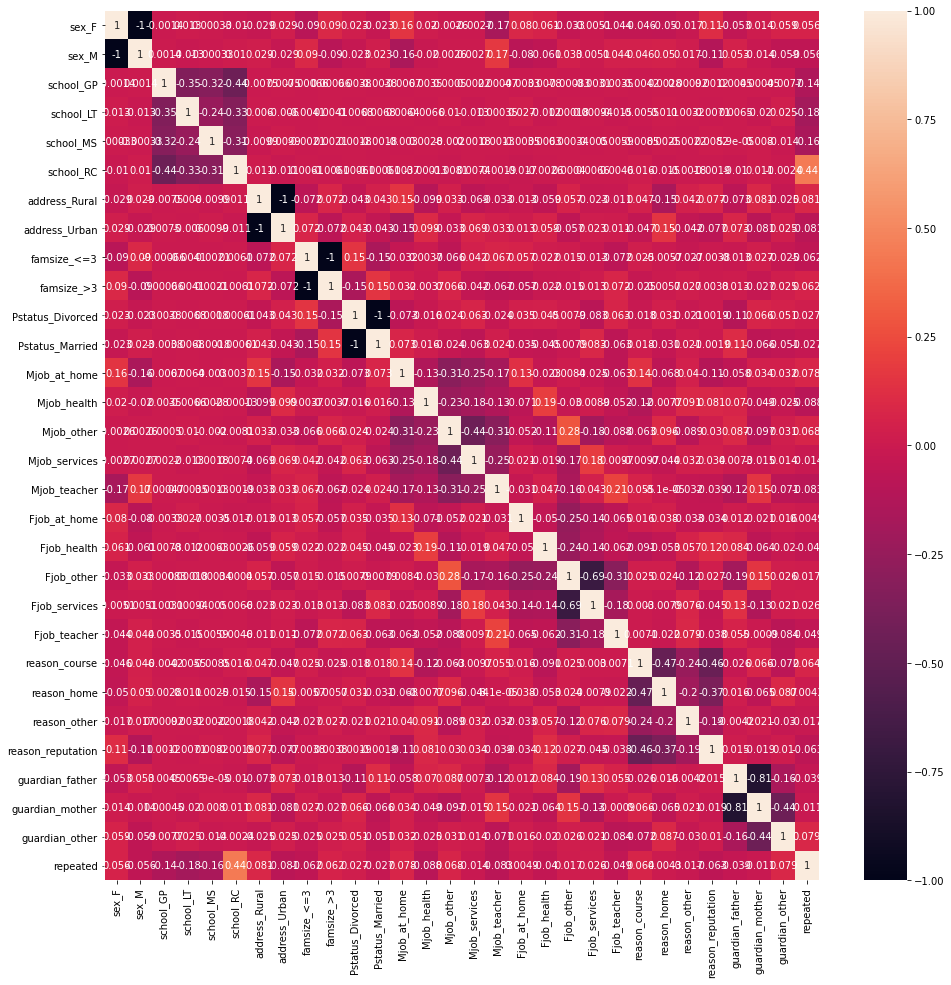

In [64]:
categorical_variables = ['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                                'guardian']
data_le = data[categorical_variables]
data_le = pd.get_dummies(data_le, columns = categorical_variables)
data_le['repeated'] =  data['repeated'] 
plt.figure(figsize = (16,16))
sns.heatmap(data_le.corr(), annot=True)
plt.show()

If we apply label encoding to categorical variables, we can build the correlation matrix for them too. We do not observe large similiarities between attributes, except in one-attribute group (between encoded values). It appears failures and school attributes are good classification features.

## Modelling and validation

In [65]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "XGBoost"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

#classifiers = [XGBClassifier()]
    

kn_parameters = [{'n_neighbors': [2, 3, 4]}]
svc_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [100]
                   # ,{'kernel': ['linear'], 'C': [100, 1000]
                    }]

dtc_parameters = [{'max_depth':[3, 5, 10], 'criterion':['entropy','gini']}]

rfc_parameters = [{'max_depth':[3, 5, 10, 15], 'n_estimators': [10, 200, 700], 
                   'max_features': ['auto', 'sqrt', 'log2']}]

mlpc_parameters = [{'max_iter':[1000], 'hidden_layer_sizes': [(10,30,1),(20,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.1],
                    'learning_rate': ['constant','adaptive']}]

adab_parameters = [{'n_estimators': np.arange(1,30,1),
                     'learning_rate': [0.01, 0.05, 0.1, 1, 1.5]}]

xgb_parameters = [{
                    'learning_rate': [0.02],
                    'n_estimators': [100],
                    'objective': ["binary:logistic"],
                    'min_child_weight': [1],
                    'gamma': [0.05, 0.1, 0.2],
                    'subsample': [0.4, 0.6, 0.8],
                    'colsample_bytree': [0.8, 1, 1.2],
                    'max_depth': [6, 7, 9]
                    }]

tuned_parameters = [{"classifier":"KNeighborsClassifier", "parameters": kn_parameters},
                    {"classifier":"SVC", "parameters": svc_parameters},
                    {"classifier":"DecisionTreeClassifier", "parameters": dtc_parameters},
                    {"classifier":"RandomForestClassifier", "parameters": rfc_parameters},
                    {"classifier":"MLPClassifier", "parameters": mlpc_parameters},
                    {"classifier":"AdaBoostClassifier", "parameters": adab_parameters},
                    {"classifier":"XGBClassifier", "parameters": xgb_parameters}
                    ]


In [66]:
data_dummy = pd.get_dummies(data, columns = ['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                                'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                                'internet', 'romantic'])
data_dummy

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_False,activities_True,nursery_False,nursery_True,higher_False,higher_True,internet_False,internet_True,romantic_False,romantic_True
0,15,2,3,2,1,0,3,5,1,1,...,0,1,0,1,0,1,1,0,1,0
1,15,4,3,1,3,0,5,4,3,1,...,0,1,0,1,0,1,0,1,1,0
2,16,4,4,2,3,0,2,4,3,1,...,0,1,0,1,0,1,0,1,0,1
3,15,3,4,1,3,0,4,3,2,1,...,0,1,0,1,0,1,0,1,1,0
4,15,2,2,1,1,0,4,3,1,1,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,19,0,1,1,2,3,3,4,2,1,...,1,0,1,0,1,0,1,0,1,0
7896,18,2,2,1,1,2,3,3,3,1,...,0,1,0,1,0,1,0,1,1,0
7897,16,4,4,1,1,0,3,5,5,2,...,0,1,0,1,0,1,0,1,1,0
7898,15,3,4,2,3,2,4,2,2,2,...,1,0,0,1,0,1,0,1,0,1


In [67]:
train_data = data_dummy[data_dummy['data_perimeter'] == "train"] 
test_data = data_dummy[data_dummy['data_perimeter'] == "validation"] 

In [68]:
X_train = train_data.copy()
X_train.pop("repeated")
X_train.pop("data_perimeter")
y_train = train_data[['repeated']].copy()

X_test = test_data.copy()
X_test.pop("repeated")
X_test.pop("data_perimeter")
y_test = test_data[['repeated']].copy()

In [69]:
%%time
best_score = 0
best_classifier = ""
best_parameters = {}
for name, clf in zip(names, classifiers):
        X_train = StandardScaler().fit_transform(X_train)
        X_test = StandardScaler().fit_transform(X_test)
        parameters = next(item for item in tuned_parameters if item["classifier"] == str(clf).split('(')[0])
        clfCV = GridSearchCV(
        clf, parameters["parameters"], scoring='accuracy', n_jobs=-1, verbose = 0
        )
        clfCV.fit(X_train, y_train.values.ravel())
        score = clfCV.score(X_test, y_test)
        print(str(clf).split('(')[0])
        print(score)
        print(f"best: {clfCV.best_params_}")
        if score > best_score:
            best_score = score
            best_classifier = str(clf).split('(')[0]
            best_parameters = clfCV.best_params_
        y_true, y_pred = y_test, clfCV.predict(X_test)
        #print(classification_report(y_true, y_pred))
print()
print()
print(f"Best classifier: {best_classifier} score: {best_score}")
print(f"Best parameters: {best_parameters}")

KNeighborsClassifier
0.8454352441613588
best: {'n_neighbors': 2}
SVC
0.8526539278131635
best: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
DecisionTreeClassifier
0.8509554140127389
best: {'criterion': 'entropy', 'max_depth': 10}
RandomForestClassifier
0.8632696390658174
best: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
MLPClassifier
0.8547770700636943
best: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 1), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'adam'}
AdaBoostClassifier
0.7622080679405521
best: {'learning_rate': 1.5, 'n_estimators': 2}


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.76988278 0.77186655 0.77583408 0.77096483 0.77006312 0.77511271
 0.76970243 0.76681695 0.76844004 0.76988278 0.77186655 0.77601443
 0.77078449 0.77042381 0.77403066 0.76970243 0.76699729 0.76825969
 0.76952209 0.77150586 0.77565374 0.77240757 0.77150586 0.77493237
 0.77024346 0.76807935 0.76862038 0.77276826 0.774211   0.77312894
 0.7716862  0.7767358  0.77475203 0.76916141 0.7729486  0.76699729
 0.7716862  0.77475203 0.77312894 0.77186655 0.77709648 0.77439134
 0.77024346 0.77150586 0.76735798 0.7716862  0.77475203 0.77312894
 0.77204689 0.7767358  0.7754734  0.77024346 0.77096483 0.76681695
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan  

[12:42:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.8683651804670913
best: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.02, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.6}


Best classifier: XGBClassifier score: 0.8683651804670913
Best parameters: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.02, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.6}
CPU times: user 24.9 s, sys: 2.62 s, total: 27.6 s
Wall time: 30min 19s


The best model is the XGBClassifier with accuracy 0.86.

## 1. Which school has the biggest average number of failures (failures column)?

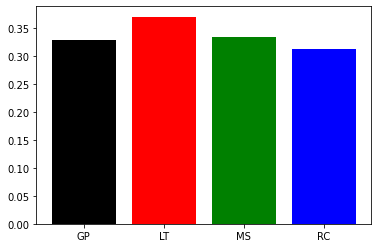

,school,school_avg_failures
0,GP,0.328937
1,LT,0.371077
2,MS,0.334254
3,RC,0.313978


In [70]:
school_avg=data.groupby('school')['failures'].mean().to_frame()
school_avg.rename(columns={"failures":"school_avg_failures"},inplace=True)
school_avg = school_avg.reset_index()

y_pos = np.arange(len(school_avg["school"]))
plt.bar(y_pos, school_avg["school_avg_failures"], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, school_avg["school"])
plt.show()
school_avg

The biggest average number of failures is in LT school.

## 2. How many PCA components (based on columns age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health, absences, repeated) are needed for 85% proportion of variance explained?

In [71]:
from sklearn.decomposition import PCA

columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
          'health', 'absences', 'repeated']
features = data[[c for c in columns]]

threshold = 0.85 
pca_obj = PCA(n_components=threshold) 
features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(features)) 


pca_obj.n_components_

10

The number of PCA components needed for 85% of variance explained is 10.